**Predicting Human Life Expectancy Based on Social services**

**Introduction**

In this exploratory data analysis, we aim to explore the relationship between life expectancy and social services across various countries. Life expectancy is a critical metric reflecting the overall health and well-being of a population, while social services encompass a wide range of factors such as healthcare access, education, economic stability, and social support systems.

Understanding how these social services impact life expectancy can provide valuable insights for policymakers, healthcare professionals, and organizations striving to improve public health outcomes. Through data analysis and predictive modeling techniques, we will investigate patterns, correlations, and predictive capabilities to gain deeper insights into this important relationship.

The dataset used for this analysis contains information on key social service indicators and life expectancy statistics for multiple countries for the year 2023. The variables chosen are post-secondary education enrollment, minimum wage, and physicians available per thousand people. 

Hummer and Hernandez (2015) found a positive correlation between college enrollment and life expectancy in both men and women. Lenhart (2017) found that higher levels of minimum wages significantly correlated with reductions in mortality rate, thus increasing life expectancy. You and Donelly (2022) found that access to physician care was a significant factor in extending regional and global life expectancy. Based on this research in addition to preliminary data visualization later presented to confirm these suggestion, these variables were deemed appropriate candidates to use as features for developing a regression model.

Using visualization tools and predictive algorithms, we will attempt to uncover meaningful patterns and build a predictive model to estimate life expectancy based on various social service factors.

The dataset used for this analysis is the Global Country Information Dataset 2023, taken from Kaggle.

https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023

In [1]:
# load the necessary libraries and set seed to begin
library(tidyverse)
library(repr)
library(tidymodels)
library(ISLR)
library(dplyr)
options(repr.matrix.max.rows = 6)
set.seed(1689)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

**Methods and Results**

In [2]:
# data is a .csv file so it can be read using read_csv
url <- "https://raw.githubusercontent.com/mariemkandeel/Group-39-Project/main/Data/world-data-2023.csv"
data <- read_csv(url)
data

Rows: 195 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): Country, Abbreviation, Agricultural Land( %), Capital/Major City, ...
dbl  (9): Birth Rate, Calling Code, Fertility Rate, Infant mortality, Life e...
num  (7): Density
(P/Km2), Land Area(Km2), Armed Forces size, Co2-Emissions,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country,Density (P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,⋯,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,60,AF,58.10%,652230,323000,32.49,93,Kabul,8672,⋯,78.40%,0.28,38041754,48.90%,9.30%,71.40%,11.12%,9797273,33.93911,67.709953
Albania,105,AL,43.10%,28748,9000,11.78,355,Tirana,4536,⋯,56.90%,1.20,2854191,55.70%,18.60%,36.60%,12.33%,1747593,41.15333,20.168331
Algeria,18,DZ,17.40%,2381741,317000,24.28,213,Algiers,150006,⋯,28.10%,1.72,43053054,41.20%,37.20%,66.10%,11.70%,31510100,28.03389,1.659626
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yemen,56,YE,44.60%,527968,40000,30.45,967,Sanaa,10609,⋯,81.00%,0.31,29161922,38.00%,NA,26.60%,12.91%,10869523,15.55273,48.51639
Zambia,25,ZM,32.10%,752618,16000,36.19,260,Lusaka,5141,⋯,27.50%,1.19,17861030,74.60%,16.20%,15.60%,11.43%,7871713,-13.13390,27.84933
Zimbabwe,38,ZW,41.90%,390757,51000,30.68,263,Harare,10983,⋯,25.80%,0.21,14645468,83.10%,20.70%,31.60%,4.95%,4717305,-19.01544,29.15486


As we started to visualize the data, we realised that we first had to clean it, since the column names had spaces in them and the minimum wage and education enrollment columns had symbols in them.

Cleaning does not affect the testing data set, rather only makes it usable.

In [3]:
data_cleaned <- rename(data, life_expectancy = "Life expectancy", education_enrollment = "Gross tertiary education enrollment (%)", physicians_per_thousand = "Physicians per thousand", min_wage = "Minimum wage")|>
mutate(education_enrollment = substr(education_enrollment, 1, nchar(education_enrollment)-1)) |>
mutate(education_enrollment = as.double(education_enrollment))|>
mutate(min_wage = substr(min_wage, 2, nchar(min_wage))) |>
mutate(min_wage = as.double(min_wage)) |>
select(Country, min_wage, life_expectancy, physicians_per_thousand, education_enrollment)
data_cleaned

Country,min_wage,life_expectancy,physicians_per_thousand,education_enrollment
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.43,64.5,0.28,9.7
Albania,1.12,78.5,1.20,55.0
Algeria,0.95,76.7,1.72,51.4
⋮,⋮,⋮,⋮,⋮
Yemen,NA,66.1,0.31,10.2
Zambia,0.24,63.5,1.19,4.1
Zimbabwe,NA,61.2,0.21,10.0


Before starting to visualize the data, let us first split it into training and testing, using a split of 0.75 and setting strata to life_expectancy.
This ensures that life_expectancy is evenly distributed among the two splits.

In [4]:
data_split <- initial_split(data_cleaned, prop = 0.75, strata = life_expectancy)
data_training <- training(data_split)
data_testing <- testing(data_split)
data_training

Country,min_wage,life_expectancy,physicians_per_thousand,education_enrollment
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.43,64.5,0.28,9.7
Benin,0.39,61.5,0.08,12.3
Burundi,NA,61.2,0.10,6.1
⋮,⋮,⋮,⋮,⋮
Switzerland,NA,83.6,4.30,59.6
United Kingdom,10.13,81.3,2.81,60.0
Uruguay,1.66,77.8,5.05,63.1


A summary of the training data is given below

In [5]:
data_summary <- data_training |>
summarize(across(min_wage:education_enrollment, mean, na.rm = TRUE)) |>
pivot_longer(cols = min_wage:education_enrollment, names_to = "Variable", values_to = "Average")|>
mutate(Missing_Observations = colSums(is.na(select(data_training, -Country))))
data_summary

Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `across(min_wage:education_enrollment, mean, na.rm = TRUE)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


Variable,Average,Missing_Observations
<chr>,<dbl>,<dbl>
min_wage,2.179464,33
life_expectancy,72.122143,5
physicians_per_thousand,1.902908,4
education_enrollment,39.373529,9


Continuing the preliminary data analysis, visualizations of the chosen features and their correlation with life expectancy are performed using the training data to affirm the correlations suggested. The axes are scaled to develop a clearer visualization of the points.

Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 34 rows containing missing values or values outside the scale range
(`geom_point()`).”


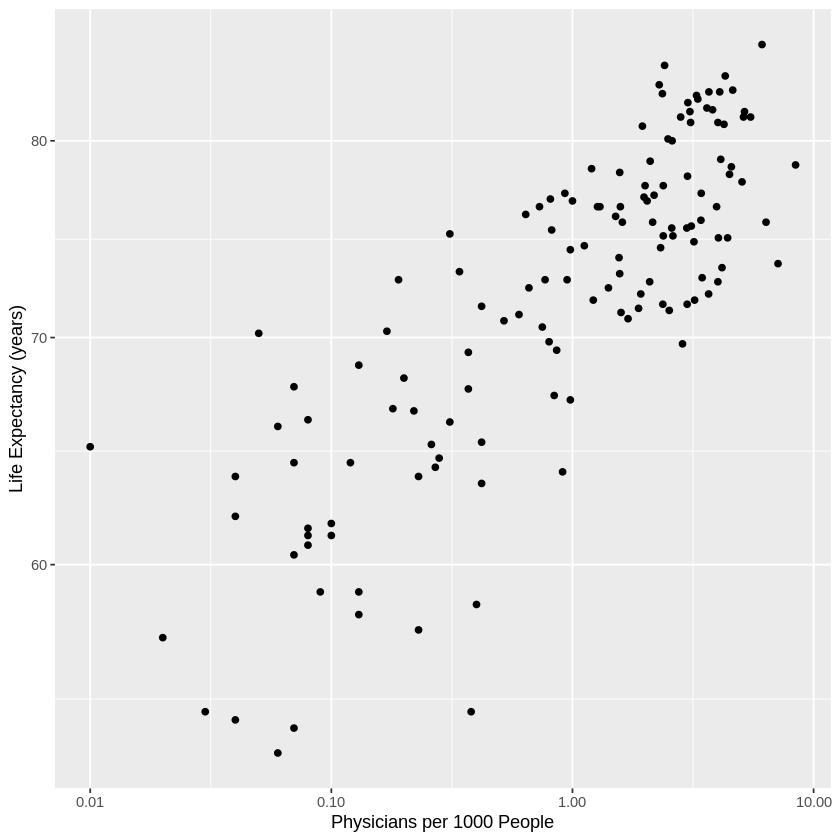

Warning message:
“Removed 9 rows containing missing values or values outside the scale range
(`geom_point()`).”


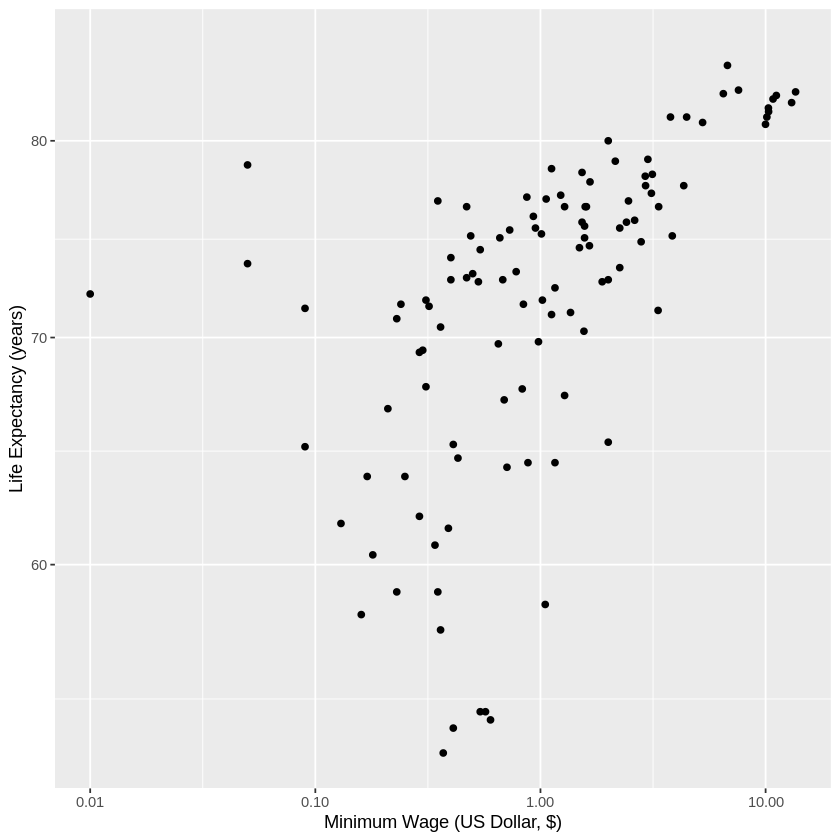

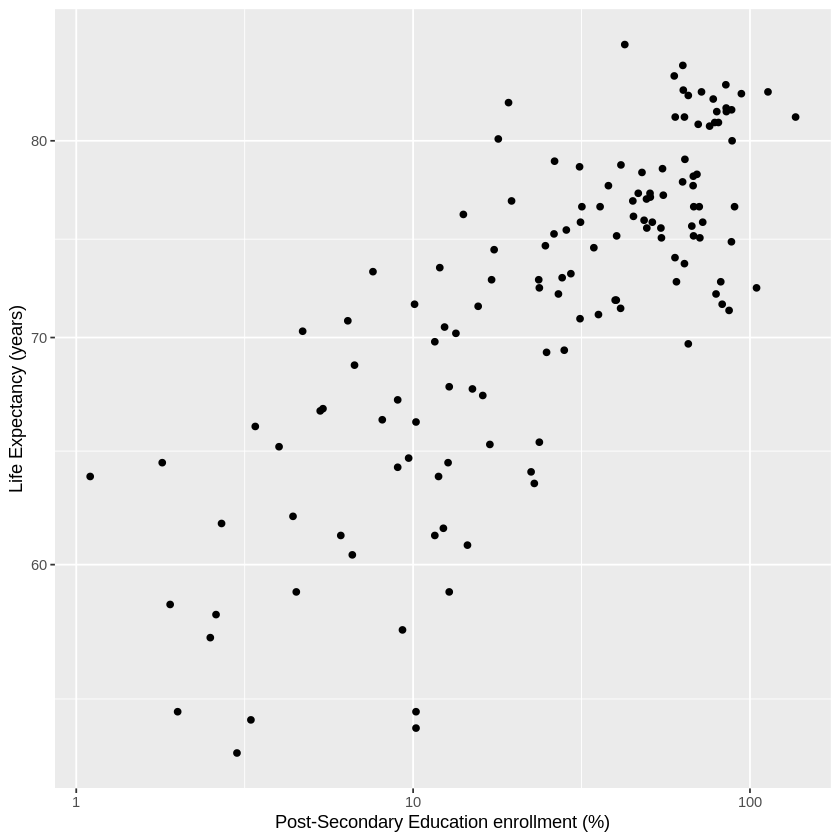

In [6]:
physicians_plot <- ggplot(data_training, aes(x = physicians_per_thousand, y = life_expectancy)) +
    geom_point() + 
    scale_x_log10() + 
    scale_y_log10() + 
    labs(x = "Physicians per 1000 People", y = "Life Expectancy (years)")
physicians_plot

min_wage_plot <- ggplot(data_training, aes(x = min_wage, y = life_expectancy)) +
    geom_point() + 
    scale_x_log10() + 
    scale_y_log10() + 
    labs(x = "Minimum Wage (US Dollar, $)", y = "Life Expectancy (years)")
min_wage_plot

education_enrollment_plot <- ggplot(data_training, aes(x = education_enrollment, y = life_expectancy)) + 
    geom_point() + 
    scale_x_log10() + 
    scale_y_log10() + 
    labs(x = "Post-Secondary Education enrollment (%)", y = "Life Expectancy (years)")
education_enrollment_plot

We see a positive linear relationship of moderate strength with all three predictors. Thus, these variables are suitable to be used for creating a regression model.



After cleaning the data and deciding on what variables will be used for the correlation with life expectancy, a regression model will be developed. Using this model, life expectancy can be predicted depending on a point's features (education enrollment, physicians per thousand, and minimum wage).

**Expected Outcomes and Significance**

It is expected that greater values of minimum wage, physicians per thousand, and education enrollment will correlate with higher life expectancy. Such a finding would serve to emphasize the benefit of investment in social services and can thus be used in advising the funding of such areas of social services on federal and municipal levels. This is further supported by the fact that the data is representative of several countries, which would suggest the prevalence of these correlations across nations. These findings can point to how future states and societies can indirectly increase the life expectancy of their citizens by improving educational resources, minimum wages, and healthcare resources in their development.

Further investigation into the impact of these features on life expectancy and the feasibility of their improvement while considering the differences that may exist among nations, such as GDP or political alignment. Thus, more specific analysis could be conducted on a country-by-country basis to confirm the applicability of any correlations found given a nation's additional features..

**References**

Hummer RA, Hernandez EM. The Effect of Educational Attainment on Adult Mortality in the United States. Popul Bull. 2013 Jun;68(1):1-16. PMID:       25995521; PMCID: PMC4435622.

Lenhart O. The impact of minimum wages on population health: evidence from 24 OECD countries. Eur J Health Econ. 2017 Nov;18(8):1031-1039. doi: 10.1007/s10198-016-0847-5. Epub 2016 Nov 14. PMID: 27844176.

You W, Donnelly F. 
Physician care access plays a significant role in extending global and regional life expectancy 
European Journal of Internal Medici. 2022;me :Pages . doi: 6205,
https://doi.org/10.1016/j.ejim.2022.2002266)

In [11]:
Before we start to build our regression model to predict life expectancy. We must first decide which mode of regression to use - KNN-regression or
linear regression. 

KNN regression is a local estimator based on the neighborhood, while linear regression is a global estimator based on a linear relationship between
variables. KNN regression predicts values based on similarity to neighboring data points, while linear regression fits a line to the data to make
predictions

ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected symbol
1: Before we
           ^


In [7]:
le_spec <- linear_reg() |>
                set_engine("lm") |>
                set_mode("regression")

le_recipe <- recipe(life_expectancy ~ min_wage + physicians_per_thousand + education_enrollment, data = data_training)

le_fit <- workflow() |>
                add_recipe(le_recipe) |>
                add_model(le_spec) |>
                fit(data = data_training)
le_spec
le_recipe
le_fit

Linear Regression Model Specification (regression)

Computational engine: lm 




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
            (Intercept)                 min_wage  physicians_per_thousand  
                64.3050                   0.6904                   1.1571  
   education_enrollment  
                 0.1015  


Using the above coefficients from the model, we can construct an equation to predict life expectancy from the other predictors

$life\: expectancy = 64.3050 + 0.6904*min\_wage + 1.1571*physicians\_per\_thousand + 0.1015*education\_enrollment$

However, since we are using 3 predictors, our equation cannot be visualized on a graph, because it is in 4 dimensions.

To see how well our model predicts on the training data, we find the rmse


In [8]:
le_rmse <- le_fit |> # how well the model works with training data
                predict(data_training) |>
                bind_cols(data_training) |>
                metrics(truth = life_expectancy, estimate = .pred) |>
                filter(.metric == 'rmse') |>
                select(.estimate) |>
                pull()
le_rmse

[1] 4.626606

The same can be done with the testing data. Here we find the rmspe

In [9]:
le_rmspe <- le_fit |>  #how well the model works with testing data
                predict(data_testing) |>
                bind_cols(data_testing) |>
                metrics(truth = life_expectancy, estimate = .pred) |>
                filter(.metric == 'rmse') |>
                select(.estimate) |>
                pull()

le_rmspe

[1] 4.017059

The numbers above that we have obtained for rmse and rmspe mean that our model can predict the life expectancy of a country with a root mean squared error of roughly 4.6 years for the training data, and 4 years for the testing data.

What this means for the accuracy of our predictions is that on average, the error that our predictor is making with a prediction is within 4 years away from the actual value.

In [10]:
# options(repr.plot.width = 7, repr.plot.height = 7)
# physicians_plot_line <- ggplot(data_training, aes(x = physicians_per_thousand, y = life_expectancy)) +
#     geom_point() + 
#     geom_abline(intercept = 1.80824474257, slope = 0.06337089358) +
#     scale_x_log10() + 
#     scale_y_log10() + 
#     labs(x = "Physicians per 1000 People", y = "Life Expectancy (years)")
# #p + geom_abline(intercept = 64.3050, slope = 1.1571)
# physicians_plot_line
